# SymPy

In [ ]:
import sympy as sp
from sympy import symbols, pi, sqrt
from sympy.functions.special.spherical_harmonics import Ynm

theta, phi = symbols('theta phi', real=True)

def quick_spherical_expansion(f, l_max):
    """
    Быстрый пример разложения по сферическим гармоникам
    """
    coefficients = {}

    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = Ynm(l, m, theta, phi)
            integrand = f * sp.conjugate(Y_lm) * sp.sin(theta)

            c_lm = sp.integrate(integrand, (phi, 0, 2*pi), (theta, 0, pi))
            coefficients[(l, m)] = c_lm

            if c_lm != 0:
                print(f"c_{{{l},{m}}} = {c_lm}")

    return coefficients

f = sp.sin(theta)

l_max = 1

# Запуск быстрого примера
quick_spherical_expansion(f, l_max)

c_{0,0} = pi**2*Ynm(0, 0, pi, 2*pi)
c_{1,-1} = -oo*sign(-2*I*Ynm(1, 1, 0, 2*pi) + 2*I*Ynm(1, 1, 0, 0)) - oo*I*(Ynm(1, 1, pi, 0) - Ynm(1, 1, pi, 2*pi) + zoo*Ynm(1, 1, pi, 2*pi))
c_{1,0} = 2*pi*Integral(sin(theta)**2*Ynm(1, 0, theta, 2*pi), (theta, 0, pi))
c_{1,1} = -oo*sign(-2*I*Ynm(1, 1, 0, 2*pi) + 2*I*Ynm(1, 1, 0, 0)) - oo*I*(Ynm(1, 1, pi, 0) - Ynm(1, 1, pi, 2*pi) + zoo*Ynm(1, 1, pi, 2*pi))


{(0, 0): pi**2*Ynm(0, 0, pi, 2*pi),
 (1,
  -1): -oo*sign(-2*I*Ynm(1, 1, 0, 2*pi) + 2*I*Ynm(1, 1, 0, 0)) - oo*I*(Ynm(1, 1, pi, 0) - Ynm(1, 1, pi, 2*pi) + zoo*Ynm(1, 1, pi, 2*pi)),
 (1, 0): 2*pi*Integral(sin(theta)**2*Ynm(1, 0, theta, 2*pi), (theta, 0, pi)),
 (1,
  1): -oo*sign(-2*I*Ynm(1, 1, 0, 2*pi) + 2*I*Ynm(1, 1, 0, 0)) - oo*I*(Ynm(1, 1, pi, 0) - Ynm(1, 1, pi, 2*pi) + zoo*Ynm(1, 1, pi, 2*pi))}

# SciPy

$$f(\theta, \varphi) = \sin(3\theta) \cdot \cos(2\varphi) + \cos(5\theta)^2$$

/tmp/ipython-input-3330385897.py:59: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm = sp.sph_harm(m, l, Phi, Theta)
/tmp/ipython-input-3330385897.py:20: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm = sp.sph_harm(m, l, phi, theta)


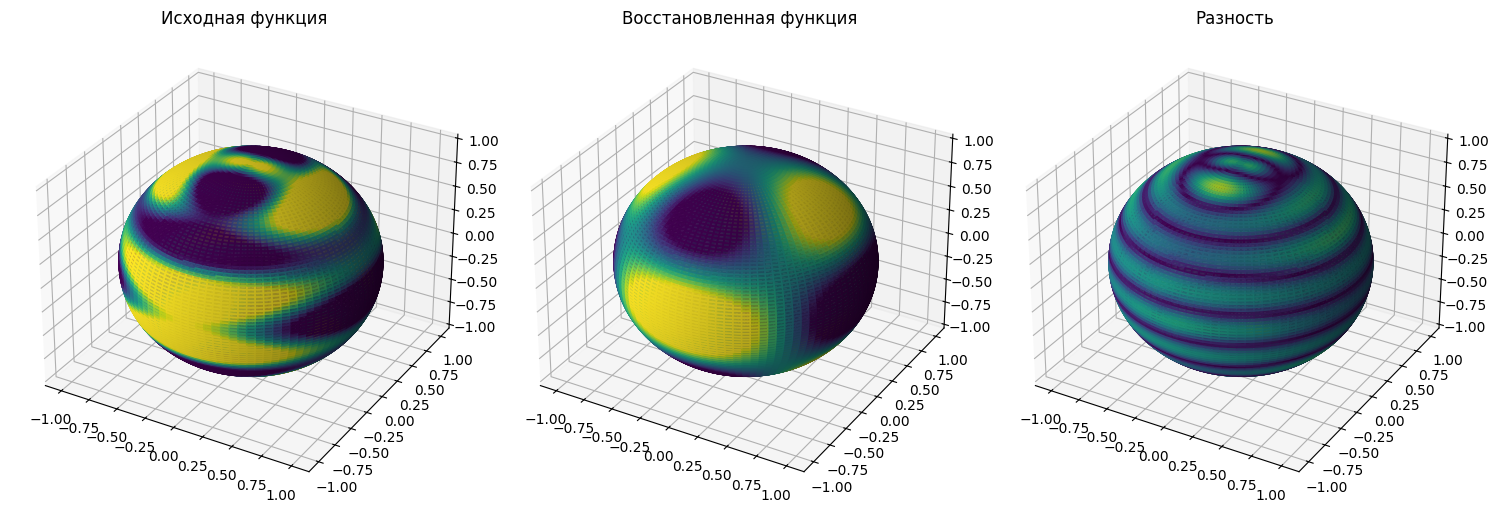

Коэффициенты разложения:
Y_0^0: 1.736710+0.000000j
Y_1^-1: 0.005574+0.000000j
Y_1^1: -0.005574+0.000000j
Y_2^-2: -0.466123-0.000000j
Y_2^0: -0.032657+0.000000j
Y_2^2: -0.466123+0.000000j
Y_3^-3: 0.001712+0.000000j
Y_3^-1: 0.014227+0.000000j
Y_3^1: -0.014227+0.000000j
Y_3^3: -0.001712+0.000000j
Y_4^-4: 0.000582+0.000000j
Y_4^-2: 1.132027+0.000000j
Y_4^0: -0.080525+0.000000j
Y_4^2: 1.132027+0.000000j
Y_4^4: 0.000582-0.000000j
Y_5^-5: -0.000246-0.000000j
Y_5^-3: 0.013006+0.000000j
Y_5^-1: 0.000978-0.000000j
Y_5^1: -0.000978-0.000000j
Y_5^3: -0.013006+0.000000j
Y_5^5: 0.000246-0.000000j


In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_harmonic_expansion(theta, phi, coeffs, l_max):
    """
    Разложение функции по сферическим гармоникам

    Parameters:
    theta, phi: сферические координаты
    coeffs: коэффициенты разложения
    l_max: максимальный порядок гармоник
    """
    result = 0.0
    idx = 0

    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sp.sph_harm(m, l, phi, theta)
            result += coeffs[idx] * Y_lm
            idx += 1

    return result

def sample_function(theta, phi):
    """Пример функции для разложения"""
    return np.sin(3*theta) * np.cos(2*phi) + np.cos(5*theta)**2

n_points = 100
theta = np.linspace(0, np.pi, n_points)
phi = np.linspace(0, 2*np.pi, n_points)
Theta, Phi = np.meshgrid(theta, phi)

f_original = sample_function(Theta, Phi)

l_max = 5
n_coeffs = (l_max + 1)**2

def compute_coefficients(func, l_max, n_theta=100, n_phi=200):
    """Вычисление коэффициентов разложения"""
    theta = np.linspace(0, np.pi, n_theta)
    phi = np.linspace(0, 2*np.pi, n_phi)
    Theta, Phi = np.meshgrid(theta, phi)

    f_values = func(Theta, Phi)

    coeffs = []
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sp.sph_harm(m, l, Phi, Theta)

            integral = np.sum(f_values * Y_lm.conjugate() * np.sin(Theta)) * \
                      (np.pi/n_theta) * (2*np.pi/n_phi)

            coeffs.append(integral)

    return np.array(coeffs)

coefficients = compute_coefficients(sample_function, l_max)
f_reconstructed = spherical_harmonic_expansion(Theta, Phi, coefficients, l_max)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
X = np.sin(Theta) * np.cos(Phi)
Y = np.sin(Theta) * np.sin(Phi)
Z = np.cos(Theta)
surf1 = ax1.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(f_original.real),
                         rstride=1, cstride=1, alpha=0.8)
ax1.set_title('Исходная функция')

ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(f_reconstructed.real),
                         rstride=1, cstride=1, alpha=0.8)
ax2.set_title('Восстановленная функция')

ax3 = fig.add_subplot(133, projection='3d')
diff = np.abs(f_original - f_reconstructed)
surf3 = ax3.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(diff),
                         rstride=1, cstride=1, alpha=0.8)
ax3.set_title('Разность')

plt.tight_layout()
plt.show()

print("Коэффициенты разложения:")
idx = 0
for l in range(l_max + 1):
    for m in range(-l, l + 1):
        if np.abs(coefficients[idx]) > 1e-10:
            print(f"Y_{l}^{m}: {coefficients[idx]:.6f}")
        idx += 1

$$f(\theta, \varphi) = \sin(2\theta) \cdot \cos(3\varphi) + 0.5 \cdot \cos(5\theta)$$

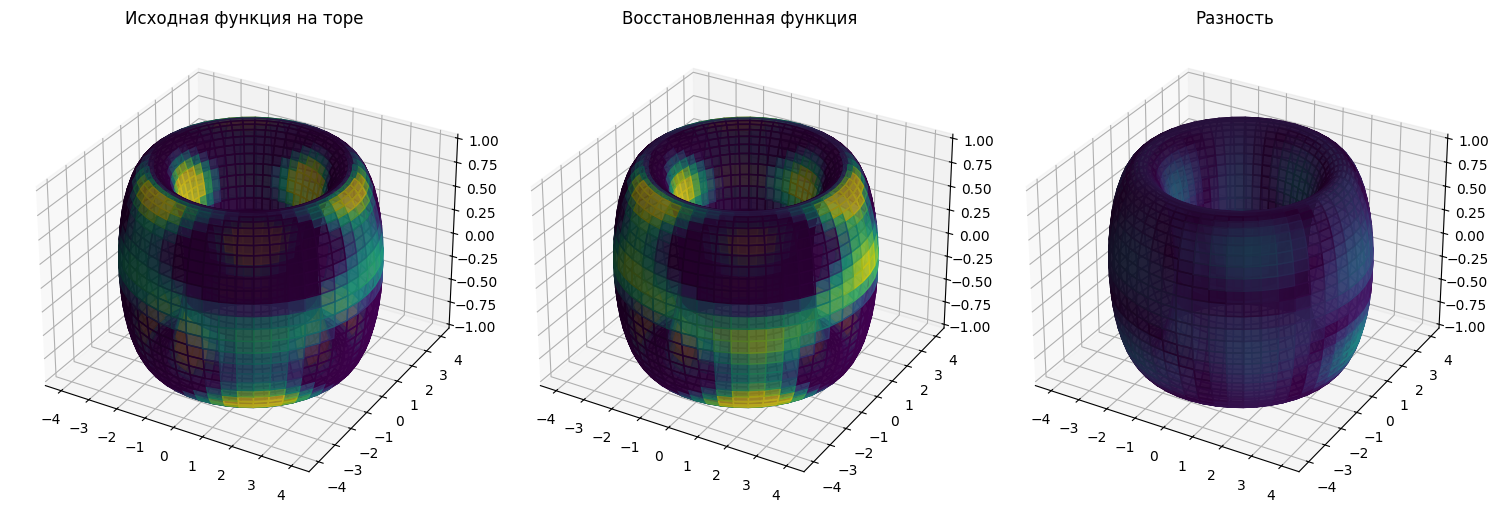

Значимые коэффициенты разложения:
T_-5_-5: 0.002533-0.000000j
T_-5_-4: 0.002533-0.000000j
T_-5_-3: 0.002533-0.000000j
T_-5_-2: 0.002533-0.000000j
T_-5_-1: 0.002533+0.000000j
T_-5_0: 0.253322-0.000000j
T_-5_1: 0.002533-0.000000j
T_-5_2: 0.002533-0.000000j
T_-5_3: 0.002533-0.000000j
T_-5_4: 0.002533-0.000000j
T_-5_5: 0.002533+0.000000j
T_-4_-5: 0.000478-0.000000j
T_-4_-4: 0.000478+0.000000j
T_-4_-3: 0.000478+0.000000j
T_-4_-2: 0.000478+0.000000j
T_-4_-1: 0.000478+0.000000j
T_-4_0: 0.047757-0.000000j
T_-4_1: 0.000478+0.000000j
T_-4_2: 0.000478+0.000000j
T_-4_3: 0.000478+0.000000j
T_-4_4: 0.000478-0.000000j
T_-4_5: 0.000478+0.000000j
T_-3_-5: 0.000066+0.000822j
T_-3_-4: 0.000066+0.000822j
T_-3_-3: 0.000066+0.041524j
T_-3_-2: 0.000066+0.000822j
T_-3_-1: 0.000066+0.000822j
T_-3_0: 0.006645+0.000822j
T_-3_1: 0.000066+0.000822j
T_-3_2: 0.000066+0.000822j
T_-3_3: 0.000066+0.041524j
T_-3_4: 0.000066+0.000822j
T_-3_5: 0.000066+0.000822j
T_-2_-5: 0.000066+0.004934j
T_-2_-4: 0.000066+0.004934j
T_-2

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import dblquad

def torus_coordinates(R, r, theta, phi):
    """Преобразование торических координат в декартовы"""
    x = (R + r * np.cos(theta)) * np.cos(phi)
    y = (R + r * np.cos(theta)) * np.sin(phi)
    z = r * np.sin(theta)
    return x, y, z

def toroidal_harmonic_basis(m, n, theta, phi, R, r):
    """
    Базисные функции для тора - произведение гармоник по theta и phi
    """
    return np.exp(1j * m * theta) * np.exp(1j * n * phi)

def compute_toroidal_coefficients(func, M_max, N_max, R, r, n_theta=100, n_phi=100):
    """
    Вычисление коэффициентов разложения функции на торе
    """
    # Создание сетки
    theta = np.linspace(0, 2*np.pi, n_theta)
    phi = np.linspace(0, 2*np.pi, n_phi)
    Theta, Phi = np.meshgrid(theta, phi)

    # Якобиан для интегрирования на торе
    jacobian = r * (R + r * np.cos(Theta))

    # Вычисление функции на сетке
    f_values = func(Theta, Phi, R, r)

    coefficients = np.zeros((2*M_max+1, 2*N_max+1), dtype=complex)

    for i, m in enumerate(range(-M_max, M_max+1)):
        for j, n in enumerate(range(-N_max, N_max+1)):
            # Базисная функция
            basis = toroidal_harmonic_basis(m, n, Theta, Phi, R, r)

            # Интегрирование (приближение суммированием)
            integral = np.sum(f_values * np.conj(basis) * jacobian)
            normalization = np.sum(np.abs(basis)**2 * jacobian)

            coefficients[i, j] = integral / normalization if normalization != 0 else 0

    return coefficients

def toroidal_harmonic_expansion(theta, phi, coefficients, R, r):
    """
    Восстановление функции по коэффициентам разложения
    """
    M_max = (coefficients.shape[0] - 1) // 2
    N_max = (coefficients.shape[1] - 1) // 2

    result = np.zeros_like(theta, dtype=complex)

    for i, m in enumerate(range(-M_max, M_max+1)):
        for j, n in enumerate(range(-N_max, N_max+1)):
            basis = toroidal_harmonic_basis(m, n, theta, phi, R, r)
            result += coefficients[i, j] * basis

    return result.real  # Возвращаем вещественную часть

# Пример 1: Простая функция на торе
def sample_torus_function(theta, phi, R, r):
    """Пример функции для разложения на торе"""
    return np.sin(2*theta) * np.cos(3*phi) + 0.5 * np.cos(5*theta)

# Параметры тора
R = 3.0  # Большой радиус
r = 1.0  # Малый радиус

# Параметры разложения
M_max = 5  # Максимальный порядок по theta
N_max = 5  # Максимальный порядок по phi

# Вычисление коэффициентов
coefficients = compute_toroidal_coefficients(
    sample_torus_function, M_max, N_max, R, r
)

# Визуализация
n_points = 50
theta = np.linspace(0, 2*np.pi, n_points)
phi = np.linspace(0, 2*np.pi, n_points)
Theta, Phi = np.meshgrid(theta, phi)

# Исходная функция
f_original = sample_torus_function(Theta, Phi, R, r)

# Восстановленная функция
f_reconstructed = toroidal_harmonic_expansion(Theta, Phi, coefficients, R, r)

# Преобразование в декартовы координаты для визуализации
X_orig, Y_orig, Z_orig = torus_coordinates(R, r, Theta, Phi)

fig = plt.figure(figsize=(15, 5))

# Исходная функция
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X_orig, Y_orig, Z_orig, facecolors=plt.cm.viridis(f_original),
                         rstride=1, cstride=1, alpha=0.8)
ax1.set_title('Исходная функция на торе')

# Восстановленная функция
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X_orig, Y_orig, Z_orig, facecolors=plt.cm.viridis(f_reconstructed),
                         rstride=1, cstride=1, alpha=0.8)
ax2.set_title('Восстановленная функция')

# Разность
ax3 = fig.add_subplot(133, projection='3d')
diff = np.abs(f_original - f_reconstructed)
surf3 = ax3.plot_surface(X_orig, Y_orig, Z_orig, facecolors=plt.cm.viridis(diff),
                         rstride=1, cstride=1, alpha=0.8)
ax3.set_title('Разность')

plt.tight_layout()
plt.show()

# Вывод коэффициентов
print("Значимые коэффициенты разложения:")
for i, m in enumerate(range(-M_max, M_max+1)):
    for j, n in enumerate(range(-N_max, N_max+1)):
        if np.abs(coefficients[i, j]) > 1e-10:
            print(f"T_{m}_{n}: {coefficients[i, j]:.6f}")